In [1]:
import matplotlib.pyplot as plt

from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from ipywidgets import *
from IPython.display import display, Math, Latex
import schemdraw
import schemdraw.elements as elm

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

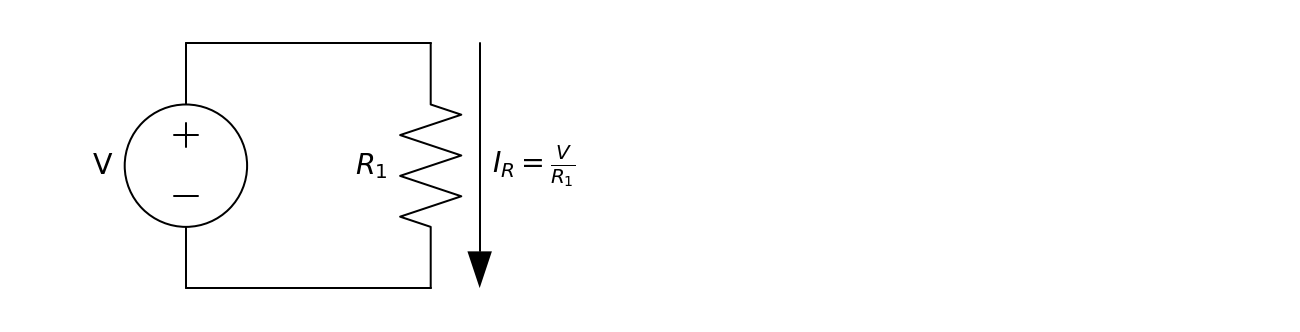

In [20]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    # d += (d1 := elm.Dot())
    d += (s1 := elm.Line())
    # d += (d2 := elm.Dot())
    d += (s2 := elm.Resistor().label('$R_1$', fontsize=30).down())
    # d += (d3 := elm.Dot())
    d += (s3 := elm.Line().left())
    # d += (d4 := elm.Dot())
    d += (s4 := elm.SourceV().label('V', fontsize=30).up())
    d += elm.CurrentLabel(top=True).at(s2).label(r'$I_R=\frac{V}{R_1}$', loc="bot", fontsize=30).down()

    # d += elm.LoopCurrent([d1, d2, d3, d4], direction='cw').label('$Current$', fontsize=30)

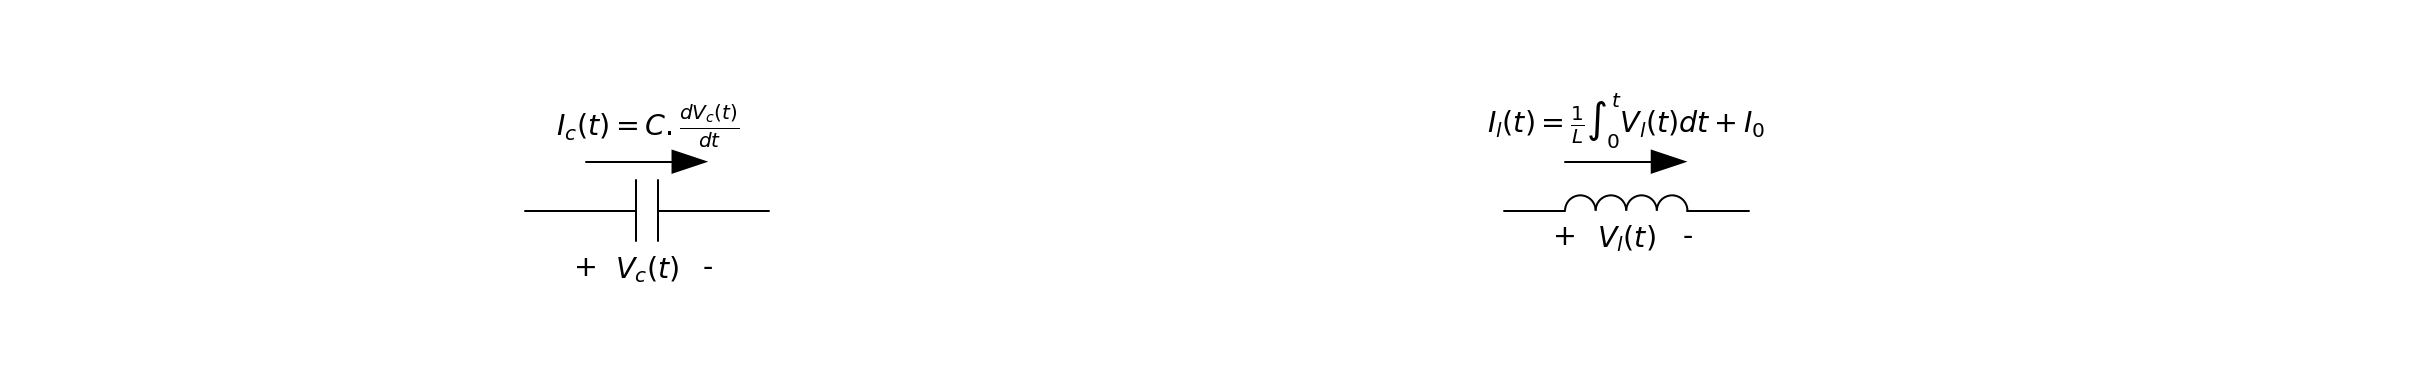

In [3]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (c1 := elm.Capacitor().label(['+', '$V_c(t)$', '-'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_c(t)= C. \frac{dV_c(t)}{dt}$', loc='top', fontsize=30)
    d += (c1 := elm.Inductor().at((8, 0)).label(['+', '$V_l(t)$', '-'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_l(t)= \frac{1}{L} \int_0^t V_l(t)dt + I_0$', loc='top', fontsize=30)


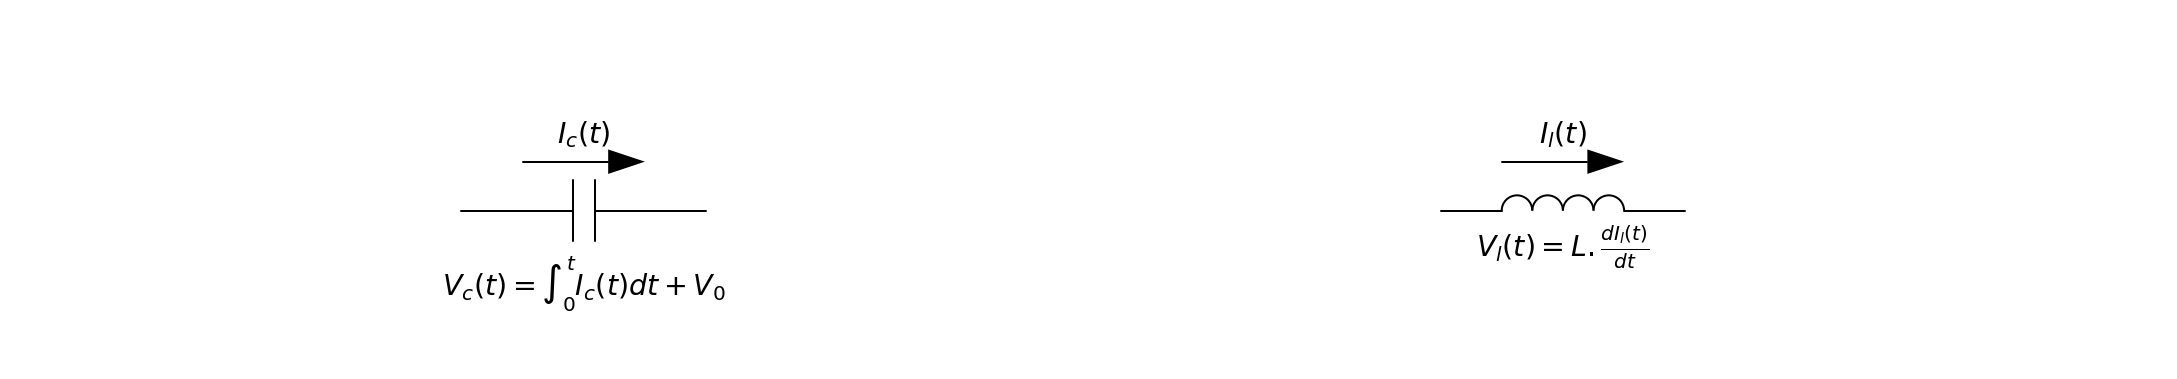

In [4]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (c1 := elm.Capacitor().label([r'$V_c(t)=\int^t_0 I_c(t) dt + V_0$'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_c(t)$', loc='top', fontsize=30)
    d += (c1 := elm.Inductor().at((8, 0)).label([r'$V_l(t)=L.\frac{dI_l(t)}{dt}$'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_l(t)$', loc='top', fontsize=30)


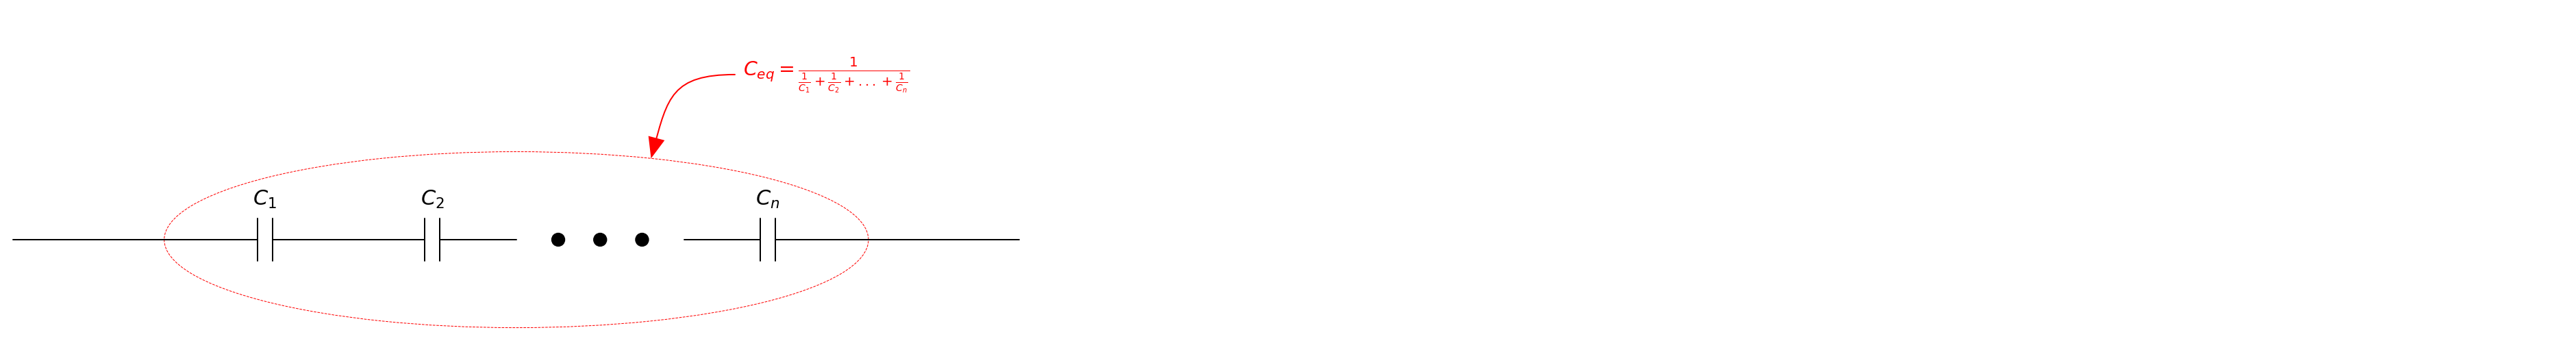

In [5]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s0 := elm.Line())
    d += (c1 := elm.Capacitor().label('$C_1$', fontsize=32))
    d += (c2 := elm.Capacitor().label('$C_2$', fontsize=32))
    d += (c3 := elm.DotDotDot())
    d += (c4 := elm.Capacitor().label('$C_n$', fontsize=32))
    d += (s0 := elm.Line())
    
    d += (series_equivelent := elm.Encircle(([c1, c2, c3, c4]), pady=.8).linestyle('--').linewidth(1).color('red'))
    d += elm.Annotate().at(series_equivelent.NNE).delta(dx=1, dy=1).label(r'$C_{eq}=\frac{1}{\frac{1}{C_1}+\frac{1}{C_2}+...+\frac{1}{C_n}}$', fontsize=30).color('red')

    # d += elm.LoopCurrent([d1, d2, d3, d4], direction='cw').label('$Current$', fontsize=30)

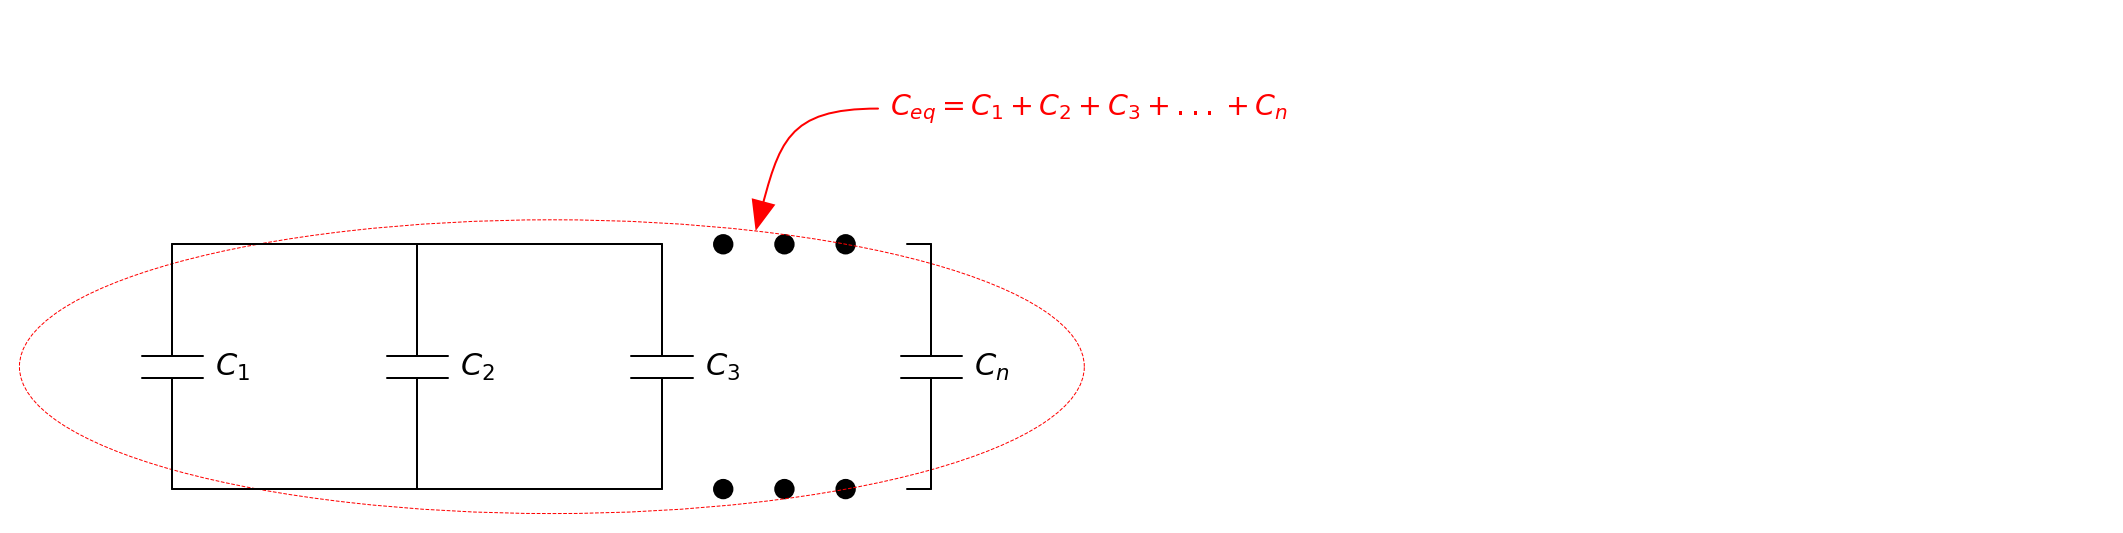

In [6]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d.push()
    d += (c1 := elm.Capacitor().down().label('$C_1$', loc='bot', fontsize=32))
    d.pop()
    d += (l1 := elm.Line().right())
    d.push()
    d += (c2 := elm.Capacitor().down().label('$C_2$', loc='bot', fontsize=32))
    d.pop()
    d += (l1 := elm.Line().right())
    d.push()
    d += (c3 := elm.Capacitor().down().label('$C_3$', loc='bot', fontsize=32))
    d.pop()
    d += (l1 := elm.DotDotDot().right())
    d.push()
    # d += (l1 := elm.Capacitor().down())
    d.pop()
    d += (l1 := elm.Line().right().length(0.2))
    d += (c4 := elm.Capacitor().down().label('$C_n$', loc='bot', fontsize=32))
    d += (l1 := elm.Line().left().length(0.2))
    d += (l1 := elm.DotDotDot().left())
    d += (l1 := elm.Line().left())
    d += (l1 := elm.Line().left())
    d += (series_equivelent := elm.Encircle(([c1, c2, c3, c4]), padx=1).linestyle('--').linewidth(1).color('red'))
    d += elm.Annotate().at(series_equivelent.NNE).delta(dx=1, dy=1).label(r'$C_{eq}=C_1+C_2+C_3+...+C_n}$', fontsize=30).color('red')

    
    # d += elm.LoopCurrent([d1, d2, d3, d4], direction='cw').label('$Current$', fontsize=30)

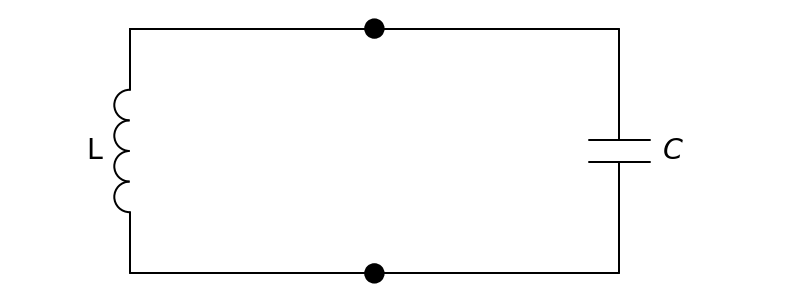

In [7]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    # d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$', fontsize=30)

<IPython.core.display.Math object>

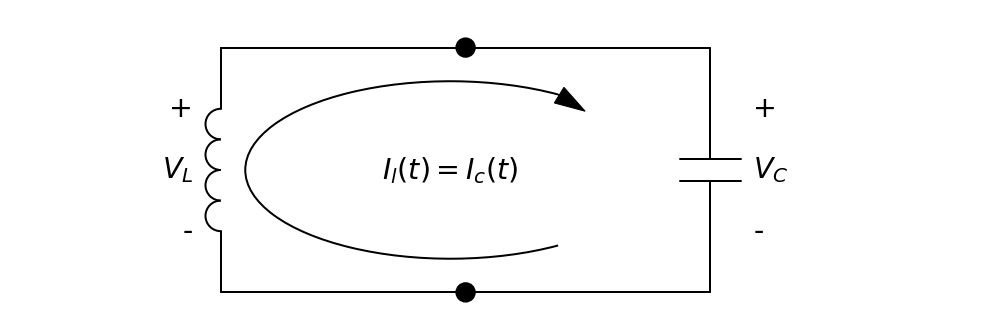

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
display(Math(r"\text{Using Kerckhoffs's Voltage law}"))
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(['+','$V_C$','-'], loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(['-','$V_L$','+'], loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label(r'$I_l(t)=I_c(t)$', fontsize=30)
display(Math(r"$V_L+V_C=0$"))
display(Math(r"$I_l(t)=I_c(t)$"))

In [9]:
# # display(Math(r"\text{Sum of all currents entering a node must be equal to 0}"))
# with schemdraw.Drawing() as d:
#     d.config(inches_per_unit=2, unit=2)
#     d += (s1 := elm.Line())
#     d += (d1 := elm.Dot().label('n0', fontsize=30))
#     d += elm.CurrentLabelInline(direction='in', ofst=0.8).at(d1).label(r'$I_l(t)$', fontsize=30)
#     d += elm.CurrentLabelInline(direction='in', ofst=-1.1).at(d1).label(r'$I_c(t)$', fontsize=30)
#     d += (s2 := elm.Line())
#     d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
#     d += (s3 := elm.Line().left())
#     d += (d2 := elm.Dot().label('n1', fontsize=30, loc='bot'))
#     d += elm.CurrentLabelInline(direction='out', ofst=0.8).at(d2).label(r'$I_l(t)$', fontsize=30)
#     d += elm.CurrentLabelInline(direction='out', ofst=-1.1).at(d2).label(r'$I_c(t)$', fontsize=30)
#     d += (s4 := elm.Line().left())
#     d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
#     d += (s5 := elm.Line().right())
#     # d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$', fontsize=30)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

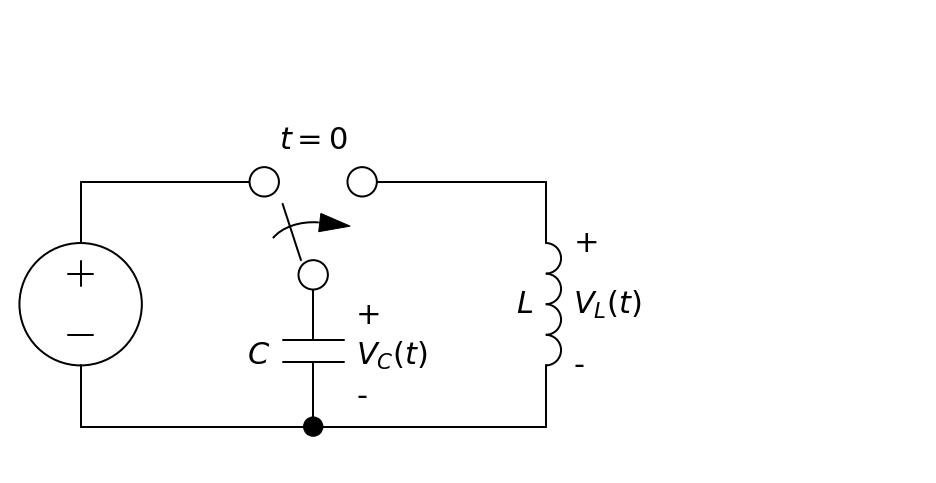

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
display(Math(r'\text{Assuming the following initial conditions:}'))
display(Math(r'$\text{Capacitor is initially charged }$'))
# display(Math(r'$\text{Current is flowing through the circuit:   }I_0 = 0$'))
# display(Math(r'$\text{Voltage accross both elements is equal:  } V_l(t) = V_c(t) = V(t)$'))

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (V1 := elm.SourceV())
    d += elm.Line().right(d.unit*.75)
    d += (S1 := elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt',fontsize=32))
    d += elm.Line().right(d.unit*.75).at(S1.c)
    d += elm.Inductor().down().label('$L$', fontsize=32).label(['+','$V_L(t)$','-'], loc='bot', fontsize=32)
    d += elm.Line().to(V1.start)
    d += elm.Capacitor().at(S1.a).toy(V1.start).label('$C$', fontsize=32).label(['+','$V_C(t)$','-'], fontsize=32, loc='bot').dot()
# display(Math(r'$\mathscr{L}\{C.\frac{dV(t)}{dt}+\frac{1}{L} \int_0^tV(t)dt\}=0$'))
display(Math(r"\text{Kerckhoffs's Voltage law}"))
display(Math(r'$V_C(t)+V_L(t)=0$'))
display(Math(r"\text{Substituting Voltages}"))
display(Math(r'$\frac{1}{C} \int_0^tI_C(t)dt+L.\frac{dI_L(t)}{dt}=0$'))
display(Math(r"\text{Converting to second order}"))
display(Math(r'$\frac{d}{dt}(\frac{1}{C} \int_0^tI_C(t)dt+L.\frac{dI_L(t)}{dt})=0$'))
display(Math(r'$\frac{I_C(t)}{C}+L.\frac{d^2I_L(t)}{dt^2}=0$'))
display(Math(r"\text{Using the fact that } I_C(t)=I_L(t)"))
display(Math(r'$\frac{I_L(t)}{C}+L.\frac{d^2I_L(t)}{dt^2}=0$'))
display(Math(r"\text{Dividing by L }"))
display(Math(r'$\frac{1}{LC}I_L(t)+\frac{d^2I_L(t)}{dt^2}=0$'))

display(Math(r"\text{One possible solution is}"))
display(Math(r'$I_L(t) = I_0\cos(\frac{t}{\sqrt{LC}})$'))
display(Math(r"\text{To see if it is lets plug it in to the second order equation...}"))
display(Math(r"\text{But FIRST we need the first and second derivative...}"))
display(Math(r'$I_L(t) = I_0\cos(\frac{t}{\sqrt{LC}})$'))
display(Math(r'$\frac{dI_L(t)}{dt} = -I_0 \frac{1}{\sqrt{LC}} \sin(\frac{t}{\sqrt{LC}})$'))
display(Math(r'$\frac{d^2I_L(t)}{dt^2} = -I_0 \frac{1}{LC} \cos(\frac{t}{\sqrt{LC}})$'))
display(Math(r"\text{Plugging in...}"))
display(Math(r'$\frac{1}{LC}I_L(t)+\frac{d^2I_L(t)}{dt^2}=0$'))
display(Math(r'$\frac{1}{LC}I_0\cos(\frac{t}{\sqrt{LC}})+(-I_0 \frac{1}{LC} \cos(\frac{t}{\sqrt{LC}}))=0$'))
display(Math(r"\text{So we ARE right...}"))
display(Math(r'$I_L(t) = I_0\cos(\frac{t}{\sqrt{LC}})$'))

display(Math(r"\text{What about the Voltage?...}"))
display(Math(r"\text{Let's use the fact that we know that the voltage accross the inductor is } V_L(t)=L.\frac{dI_l(t)}{dt}"))
display(Math(r"\text{Substituting the first derivative of current}"))
display(Math(r'$\frac{dI_L(t)}{dt} = -I_0 \frac{1}{\sqrt{LC}} \sin(\frac{t}{\sqrt{LC}})$'))
display(Math(r'$V_L(t)=-L.I_0 \frac{1}{\sqrt{LC}} \sin(\frac{t}{\sqrt{LC}})$'))
display(Math(r"\text{Simplifying}"))
display(Math(r'$V_L(t)=-I_0 \sqrt{\frac{L}{C}} \sin(\frac{t}{\sqrt{LC}})$'))

# display(Math(r'$\mathscr{L}\{C.\frac{dV_c(t)}{dt}+\frac{1}{L} \int_0^tV_l(t)dt+I_0\}=\mathscr{L}\{0\}$'))
# display(Math(r"\text{Applying initial conditions}"))
# display(Math(r'$\mathscr{L}\{C.\frac{dV(t)}{dt}+\frac{1}{L} \int_0^tV(t)dt\}=\mathscr{L}\{0\}$'))


In [16]:
display(Math(r'$V_L(t)=-I_0 \sqrt{\frac{L}{C}} \sin(\frac{t}{\sqrt{LC}})$'))
display(Math(r'$I_L(t) = I_0\cos(\frac{t}{\sqrt{LC}})$'))

def simulate(I0 = 1, L=0.05, C=0.05, R=0, show_voltage=True, show_current=True):
    circuit = Circuit('LCCircuit')
    circuit.L(1, 'node_01', circuit.gnd, L@u_mH) 
    circuit.C(2, 'node_01', 'node_02', C@u_mF)
    circuit.R(1, 'node_02', circuit.gnd, R@u_Ohm)
    Tf =3@u_ms
    T = 0.1@u_ms
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    simulator.initial_condition(node_01 = I0@u_V)
    analysis = simulator.transient(step_time=T/10, end_time=Tf)
    fig, ax1 = plt.subplots()
    a,b = -5e10,5e10
    if show_current:
        ax1.set_title(f'I(t)&V(t) @I0={I0}, C={C}, L={L}')
        ax1.set_xlabel('Time in ms')
        # ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax1.plot(analysis.branches['l1']) 
        ax1.set_ylabel('A')
        color = 'tab:blue'
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim(a,b)
    
    if show_voltage:
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.plot(analysis['node_01'], 'r')
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylabel('V')
        ax2.set_ylim(a,b)

    
interact(simulate, I0=(1,5,0.01), C=(0.1, 0.5, 0.01), L=(0.1, 0.5, 0.01), R=(0, 1, 0.01), show_voltage=True, show_current=True)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

interactive(children=(FloatSlider(value=1.0, description='I0', max=5.0, min=1.0, step=0.01), FloatSlider(value…

<function __main__.simulate(I0=1, L=0.05, C=0.05, R=0, show_voltage=True, show_current=True)>

In [13]:
display(Math(r"\text{What else is a capacitor used for?}"))

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.learningaboutelectronics.com/images/Couplingcapacitor.jpg")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

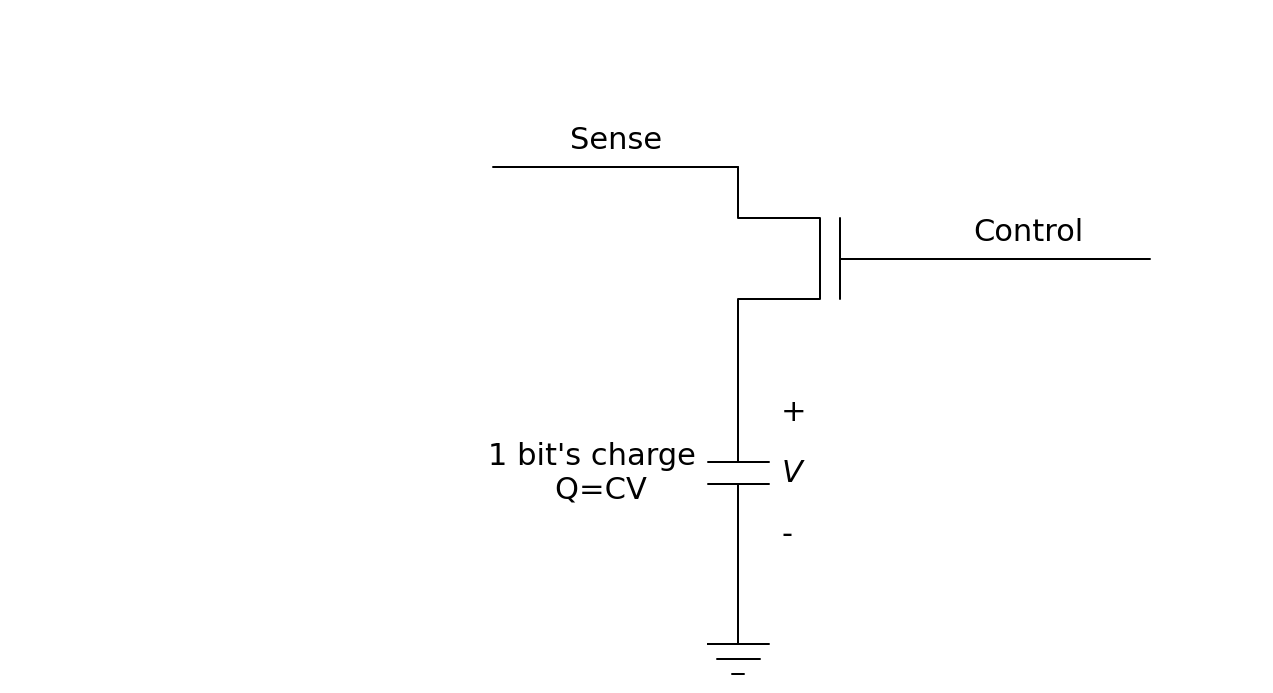

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
display(Math(r"\text{What about something we use everyday?}"))
display(Math(r"\text{RAM}"))
display(Math(r"\text{Introducing the 1T1C DRAM Cell}"))
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line().label('Sense', fontsize=32))
    d += (t1 := elm.transistors.NFet())
    d += (s1 := elm.Line().at(t1.gate).label('Control', fontsize=32))
    
    d += (d1 := elm.Capacitor().down().at(t1.source).label("1 bit's charge\nQ=CV     ", fontsize=32).label(['+', '$V$', '-'], loc='bot', fontsize=32))
    d += (d1 := elm.Ground())
    # d += (s2 := elm.Line())
    # d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
    # d += (s3 := elm.Line().left())
    # d += (d2 := elm.Dot())
    # d += (s4 := elm.Line().left())
    # d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    # d += (s5 := elm.Line().right())
display(Math(r"\text{We read by setting control to high and comparing voltage of capacitor to some reference with a comparator?}"))
display(Math(r"\text{If V greater than comparator reference then value of bit is 1 else 0}"))
display(Math(r"\text{Why is it called (D)ynamic RAM? because you need to keep refreshing because charge in the capacitor leakse, you refresh by reading through the comparitor}"))
display(Math(r"\text{What's the relationship between electrons and information here?}"))
display(Math(r"\text{Assuming Capacitance C=75fF}"))
display(Math(r"\text{Assuming V=3}"))
display(Math(r"\text{Q=10^-15 coulomb}"))
display(Math(r"\text{1 coulomb = 10^19 electrons}"))
display(Math(r"\text{So the capacitor needs ~1000 electrons to store 1 bit}"))
display(Math(r"\text{Can we make that a little more efficient?}"))